In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
pd.set_option("display.max_colwidth", 200)

# Excel'i oku
df = pd.read_excel("../data/raw/Talent_Academy_Case_DT_2025.xlsx")

# ilk satırlar + temel info
display(df.head())
print("Şekil:", df.shape)
print(df.dtypes)


ModuleNotFoundError: No module named 'pandas'

In [5]:
!pip install pandas numpy matplotlib seaborn scikit-learn openpyxl pyarrow



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
print("Pandas version:", pd.__version__)


Pandas version: 2.3.2


In [7]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
pd.set_option("display.max_colwidth", 200)

df = pd.read_excel("../data/raw/Talent_Academy_Case_DT_2025.xlsx")  # gerekirse: pip install openpyxl
display(df.head())
print("Şekil:", df.shape)
print(df.dtypes)


,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Kalp yetmezliği","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis, Becker Musküler Distrofisi, Hipertansiyon","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis, Becker Musküler Distrofisi, Hipertansiyon","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis, Becker Musküler Distrofisi, Hipertansiyon","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis, Becker Musküler Distrofisi, Hipertansiyon","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika


Şekil: (2235, 13)
HastaNo             int64
Yas                 int64
Cinsiyet           object
KanGrubu           object
Uyruk              object
KronikHastalik     object
Bolum              object
Alerji             object
Tanilar            object
TedaviAdi          object
TedaviSuresi       object
UygulamaYerleri    object
UygulamaSuresi     object
dtype: object


In [8]:
missing = df.isna().sum().sort_values(ascending=False)
print(missing)


Alerji             944
KanGrubu           675
KronikHastalik     611
UygulamaYerleri    221
Cinsiyet           169
Tanilar             75
Bolum               11
HastaNo              0
Yas                  0
Uyruk                0
TedaviAdi            0
TedaviSuresi         0
UygulamaSuresi       0
dtype: int64


In [10]:
df["TedaviSuresi_clean"] = df["TedaviSuresi"].str.extract(r"(\d+)").astype(float)
df[["TedaviSuresi", "TedaviSuresi_clean"]].head(10)



,TedaviSuresi,TedaviSuresi_clean
0,5 Seans,5.0
1,15 Seans,15.0
2,15 Seans,15.0
3,15 Seans,15.0
4,15 Seans,15.0
5,15 Seans,15.0
6,10 Seans,10.0
7,10 Seans,10.0
8,10 Seans,10.0
9,15 Seans,15.0


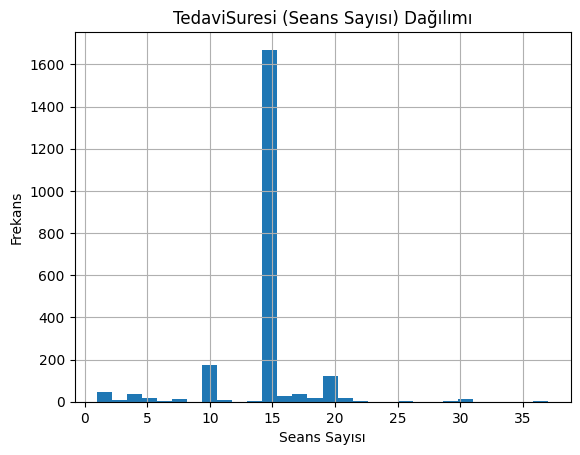

count    2235.000000
mean       14.570917
std         3.725322
min         1.000000
25%        15.000000
50%        15.000000
75%        15.000000
max        37.000000
Name: TedaviSuresi_clean, dtype: float64


In [11]:
# Histogram
df["TedaviSuresi_clean"].hist(bins=30)
plt.title("TedaviSuresi (Seans Sayısı) Dağılımı")
plt.xlabel("Seans Sayısı")
plt.ylabel("Frekans")
plt.show()

# İstatistiksel özet
print(df["TedaviSuresi_clean"].describe())


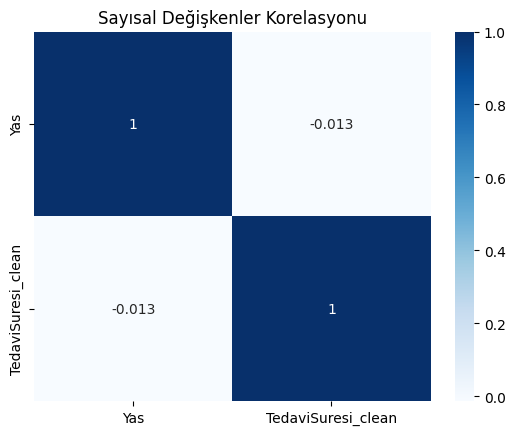

In [12]:
num_cols = ["Yas", "UygulamaSuresi", "TedaviSuresi_clean"]
num_cols = [c for c in num_cols if c in df.columns]

sns.heatmap(df[num_cols].corr(numeric_only=True), annot=True, cmap="Blues")
plt.title("Sayısal Değişkenler Korelasyonu")
plt.show()


In [13]:
for c in ["Cinsiyet","KanGrubu","Uyruk","Bolum","TedaviAdi"]:
    if c in df.columns:
        print(f"\n--- {c} ---")
        print(df[c].value_counts(dropna=False).head(10))



--- Cinsiyet ---
Cinsiyet
Kadın    1274
Erkek     792
NaN       169
Name: count, dtype: int64

--- KanGrubu ---
KanGrubu
NaN       675
0 Rh+     579
A Rh+     540
B Rh+     206
AB Rh+     80
B Rh-      68
A Rh-      53
0 Rh-      26
AB Rh-      8
Name: count, dtype: int64

--- Uyruk ---
Uyruk
Türkiye       2173
Tokelau         27
Arnavutluk      13
Azerbaycan      12
Libya           10
Name: count, dtype: int64

--- Bolum ---
Bolum
Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    2045
Ortopedi Ve Travmatoloji                            88
İç Hastalıkları                                     32
Nöroloji                                            17
Kardiyoloji                                         11
NaN                                                 11
Göğüs Hastalıkları                                   8
Laboratuar                                           7
Genel Cerrahi                                        6
Tıbbi Onkoloji                                       6
Name: count, 

In [14]:
from collections import Counter

def split_multi(x):
    if pd.isna(x): return []
    return [p.strip() for p in str(x).replace(";",",").split(",") if p.strip()]

for col in ["KronikHastalik","Alerji","Tanilar","UygulamaYerleri"]:
    if col in df.columns:
        s = df[col].apply(split_multi)
        counter = Counter([z for row in s for z in row])
        print(f"\nTop 10 etiket — {col}")
        print(counter.most_common(10))



Top 10 etiket — KronikHastalik
[('Aritmi', 395), ('Hiportiroidizm', 383), ('Limb-Girdle Musküler Distrofi', 379), ('Astım', 351), ('Hipertiroidizm', 327), ('Myastenia gravis', 316), ('Diyabet', 308), ('Duchenne Musküler Distrofisi', 307), ('Fascioscapulohumeral Distrofi', 304), ('Kalp yetmezliği', 301)]

Top 10 etiket — Alerji
[('Polen', 330), ('POLEN', 170), ('Toz', 138), ('TOZ', 121), ('NOVALGIN', 110), ('ARVELES', 102), ('CORASPIN', 102), ('Sucuk', 96), ('Yer Fıstığı', 83), ('SUCUK', 78)]

Top 10 etiket — Tanilar
[('DORSALJİ', 695), ('DİĞER', 676), ('tanımlanmamış', 408), ('Omuzun darbe sendromu', 272), ('İntervertebral disk bozuklukları', 269), ('LUMBOSAKRAL BÖLGE', 265), ('SERVİKOTORASİK BÖLGE', 211), ('SERVİKAL BÖLGE', 148), ('Eklem ağrısı', 113), ('Dorsalji', 105)]

Top 10 etiket — UygulamaYerleri
[('Bel', 543), ('Boyun', 388), ('Diz', 177), ('Sol Omuz Bölgesi', 140), ('Sağ Omuz Bölgesi', 132), ('Sırt', 96), ('Sol El Bilek Bölgesi', 86), ('Sağ Ayak Bileği Bölgesi', 68), ('Sol A

In [16]:
import os
from collections import Counter

os.makedirs("../plots", exist_ok=True)

def split_multi(x):
    if pd.isna(x): return []
    return [p.strip() for p in str(x).replace(";",",").split(",") if p.strip()]

def save_all_plots(df):
    # 1) Hedef değişken histogramı
    df["TedaviSuresi_clean"].hist(bins=30)
    plt.title("TedaviSuresi (Seans) Dağılımı")
    plt.xlabel("Seans Sayısı"); plt.ylabel("Frekans")
    plt.savefig("../plots/tedavi_suresi_hist.png", bbox_inches="tight"); plt.close()
    
    # 2) Sayısal korelasyon heatmap
    num_cols = [c for c in ["Yas","UygulamaSuresi","TedaviSuresi_clean"] if c in df.columns]
    if len(num_cols) >= 2:
        sns.heatmap(df[num_cols].corr(numeric_only=True), annot=True, cmap="Blues")
        plt.title("Sayısal Korelasyon Isı Haritası")
        plt.savefig("../plots/num_corr_heatmap.png", bbox_inches="tight"); plt.close()
    
    # 3) Eksik değer bar grafiği
    missing = df.isna().sum().sort_values(ascending=True)
    missing = missing[missing > 0]
    if not missing.empty:
        missing.plot(kind="barh")
        plt.title("Eksik Değer Sayıları")
        plt.xlabel("Adet")
        plt.savefig("../plots/missing_counts.png", bbox_inches="tight"); plt.close()
    
    # 4) Kategorik değişkenlerin en sık 10 değeri
    for col in ["Cinsiyet","KanGrubu","Bolum","TedaviAdi"]:
        if col in df.columns:
            vc = df[col].value_counts().head(10)
            vc.plot(kind="bar")
            plt.title(f"{col} — En Sık 10 Değer")
            plt.xlabel(col); plt.ylabel("Adet")
            plt.tight_layout()
            plt.savefig(f"../plots/bar_{col}_top10.png", bbox_inches="tight"); plt.close()
    
    # 5) Multi-label sütunların en sık 10 etiketi
    for col in ["KronikHastalik","Alerji","Tanilar","UygulamaYerleri"]:
        if col in df.columns:
            s = df[col].apply(split_multi)
            counter = Counter([z for row in s for z in row])
            top = dict(counter.most_common(10))
            if top:
                pd.Series(top).plot(kind="bar")
                plt.title(f"{col} — En Sık 10 Etiket")
                plt.xlabel(col); plt.ylabel("Adet")
                plt.tight_layout()
                plt.savefig(f"../plots/ml_{col}_top10.png", bbox_inches="tight"); plt.close()

# Fonksiyonu çağır
save_all_plots(df)


In [17]:
df["Yas"].describe()


count    2235.000000
mean       47.327069
std        15.208634
min         2.000000
25%        38.000000
50%        46.000000
75%        56.000000
max        92.000000
Name: Yas, dtype: float64

In [18]:
import pandas as pd, re

# 1) Temiz veri dosyasını oku
dfc = pd.read_parquet("artifacts/clean_dataset.parquet")

print("▶ TEMİZ VERİ ŞEKİLİ:", dfc.shape)            # (satır, sütun)
print("▶ SONDAN 5 KOLON:", list(dfc.columns[-5:]))  # son kolonlar
print("▶ HEDEF ÖRNEK:", dfc["__target__TedaviSuresi"].head().tolist())

# 2) Multi-label genişleyen sütun sayıları
def count_prefix(prefix):
    return sum(1 for c in dfc.columns if c.startswith(prefix+"__"))

for col in ["KronikHastalik","Alerji","Tanilar","UygulamaYerleri"]:
    print(f"▶ {col} binary sütun sayısı:", count_prefix(col))

# 3) Kategorik OHE örnekleri (ilk 10 kolon adına bakış)
ohe_like = [c for c in dfc.columns if "__" not in c and c != "__target__TedaviSuresi"]
print("▶ Olası OHE sütunlarından örnek:", ohe_like[:10])

# 4) Null kontrol (olmamalı):
null_sum = dfc.isna().sum().sum()
print("▶ Toplam NA sayısı:", int(null_sum))

# 5) Sayısal ölçekleme kontrolü (ortalama ~0, std ~1 olmalı) - ilk 5 sayısal kolonda kabaca kontrol
num_cols = [c for c in dfc.columns if c != "__target__TedaviSuresi" and dfc[c].dtype!='O'][:5]
print("▶ Ölçek kontrol kolonları:", num_cols)
print("▶ Ortalamalar:", [round(dfc[c].mean(),3) for c in num_cols])
print("▶ Std'ler:", [round(dfc[c].std(),3) for c in num_cols])


FileNotFoundError: [Errno 2] No such file or directory: 'artifacts/clean_dataset.parquet'

In [1]:
import pandas as pd
dfc = pd.read_parquet("../artifacts/clean_dataset.parquet")
dfc.shape, dfc.columns[-5:], dfc["__target__TedaviSuresi"].head()


((2235, 619),
 Index(['UygulamaSuresi_40 Dakika', 'UygulamaSuresi_45 Dakika',
        'UygulamaSuresi_5 Dakika', 'UygulamaSuresi_8 Dakika',
        '__target__TedaviSuresi'],
       dtype='object'),
 0     5.0
 1    15.0
 2    15.0
 3    15.0
 4    15.0
 Name: __target__TedaviSuresi, dtype: float64)

In [3]:
import pandas as pd

parquet_path = r"C:\Users\dilek\Desktop\Pusula_Dilek_Yilmaz\artifacts\clean_dataset.parquet"
csv_path = r"C:\Users\dilek\Desktop\Pusula_Dilek_Yilmaz\artifacts\clean_dataset.csv"

pd.read_parquet(parquet_path).to_csv(csv_path, index=False)
print("CSV olarak kaydedildi:", csv_path)



CSV olarak kaydedildi: C:\Users\dilek\Desktop\Pusula_Dilek_Yilmaz\artifacts\clean_dataset.csv
